### Exploratory Data Analysis

**Objective**

This notebook performs exploratory data analysis (EDA) to understand patterns in:

- Medical test outcomes (Normal, Abnormal, Inconclusive)

- Medical conditions, admission types, and demographics

- Billing amount behaviour, including negative values

The objective is to:

- Identify meaningful associations

- Assess data quality and distribution

- Determine whether the dataset supports inferential or predictive modeling

and Deliver Primary Objective for Hypothesis

In [ ]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Loading the Data**

In [ ]:
# Define the patient data path
PATIENT_PATH = "cleaned_healthcare_dataset.csv"

In [4]:
# Loading the Cleaned Dataset
patient_df = pd.read_csv(PATIENT_PATH)

In [5]:
# Observing the Date Granularity - Daily, Weekly, Monthly Observations
print(patient_df["Date of Admission"].sort_values(ascending=True).nunique())

1827


In [6]:
# Daily Granularity check for date range
(pd.to_datetime("2024-05-07") - pd.to_datetime("2019-05-08")).days

1826

#### **0. Feature Engineering**

In [7]:
# Age Group 

# Binning Age into categories
age_bins = [0, 18, 35, 50, 65, 80, 100]
#age_labels = ['0-17', '18-34', '35-49', '50-64', '65-79', '80+']
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+']
patient_df['Age Group'] = pd.cut(patient_df['Age'], bins = age_bins, labels = age_labels)

In [8]:
# Years, Months and Length of Stay

# Converting 'Admission_Date' and 'Discharge_Date' to datetime format
patient_df['Date of Admission'] = pd.to_datetime(patient_df['Date of Admission'])
patient_df['Discharge Date'] = pd.to_datetime(patient_df['Discharge Date'])

# 
patient_df['Year'] = patient_df['Date of Admission'].dt.year
patient_df['month'] = patient_df['Date of Admission'].dt.month

patient_df['Date of Admission'] = pd.to_datetime(patient_df['Date of Admission'])
patient_df['Discharge Date'] = pd.to_datetime(patient_df['Discharge Date'])

patient_df['Length Of Stay'] = (
    patient_df['Discharge Date'] - patient_df['Date of Admission']
).dt.days

###  **1. Univariate Analysis**

Goal: Understand individual variable distributions and identify early red flags for modeling.

##### Age

In [9]:
patient_df['Age'].describe()


count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

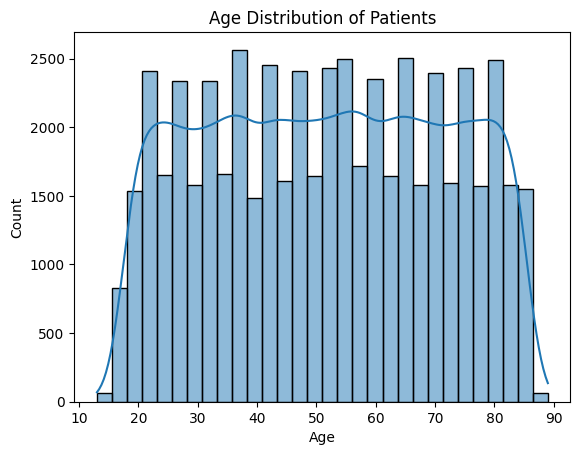

In [10]:
# 
sns.histplot(patient_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

#### Gender

In [11]:
# Gender Distribution in Percentage
patient_df['Gender'].value_counts(normalize=True) * 100


Gender
Male      50.023651
Female    49.976349
Name: proportion, dtype: float64

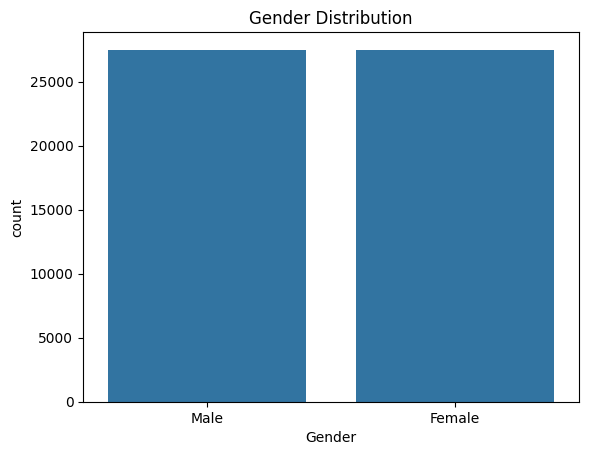

In [12]:
# Gender Distribution Plot

sns.countplot(data=patient_df, x='Gender', order=patient_df['Gender'].value_counts().index)
plt.title('Gender Distribution')
plt.show()


#### Medical Condition - Clinical Profile Analysis (What Conditions Drive Care?)

In [13]:
patient_df['Medical Condition'].value_counts(normalize=True) * 100

Medical Condition
Arthritis       16.770367
Diabetes        16.766729
Hypertension    16.648474
Obesity         16.639377
Cancer          16.628461
Asthma          16.546592
Name: proportion, dtype: float64

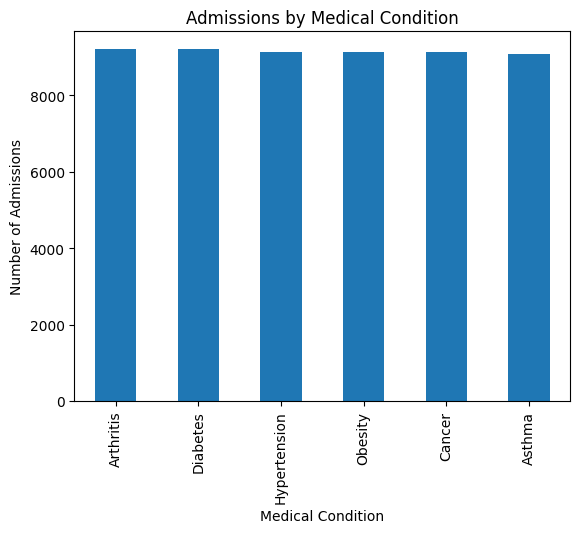

In [14]:
patient_df['Medical Condition'].value_counts().plot(kind='bar')
plt.title('Admissions by Medical Condition')
plt.ylabel('Number of Admissions')
plt.show()


#### Admission Type Analysis (How Are Patients getting Admitted to the Hopsitals?)

In [15]:
# Admission Type Distribution in Percentage
patient_df['Admission Type'].value_counts(normalize=True) * 100

Admission Type
Elective     33.608049
Urgent       33.458865
Emergency    32.933086
Name: proportion, dtype: float64

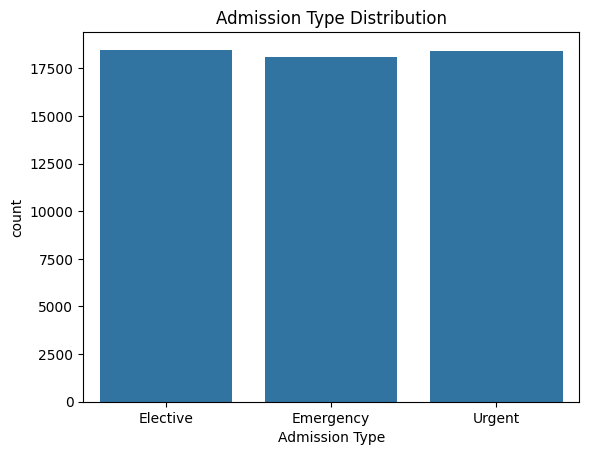

In [16]:
# Admission Type Distribution Plot
sns.countplot(data=patient_df, x='Admission Type')
plt.title('Admission Type Distribution')
plt.show()


- Emergency: Unplanned and requires immediate care
- Urgent: Unplanned, but can tolerate a short delay
- Elective: Scheduled beforehand

#### Test Results Analysis (Clinical Efficiency Signal)

In [17]:
# Test Results Distribution in Percentage
patient_df['Test Results'].value_counts(normalize=True) * 100


Test Results
Abnormal        33.542554
Normal          33.349707
Inconclusive    33.107739
Name: proportion, dtype: float64

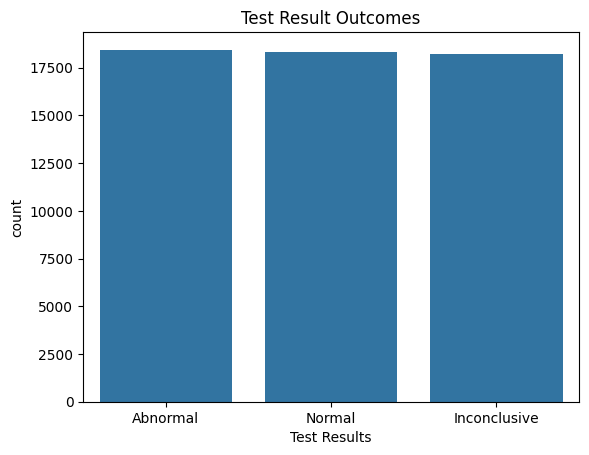

In [18]:
# Test Results Distribution Plot 

order = patient_df['Test Results'].value_counts().index

sns.countplot(data=patient_df, x='Test Results', order=order)
plt.title('Test Result Outcomes')
plt.show()

####  Billing Amount

<Axes: xlabel='Billing Amount', ylabel='Count'>

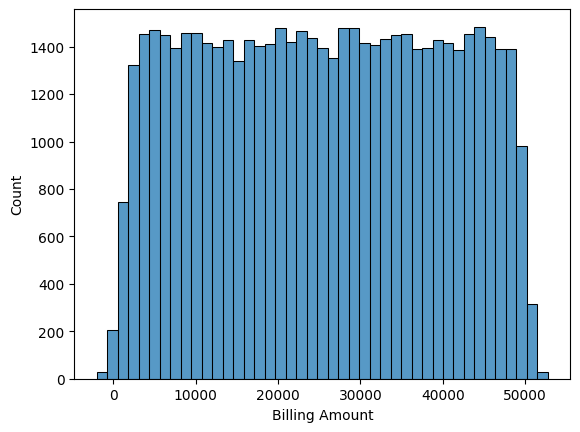

In [19]:
sns.histplot(data = patient_df['Billing Amount'])

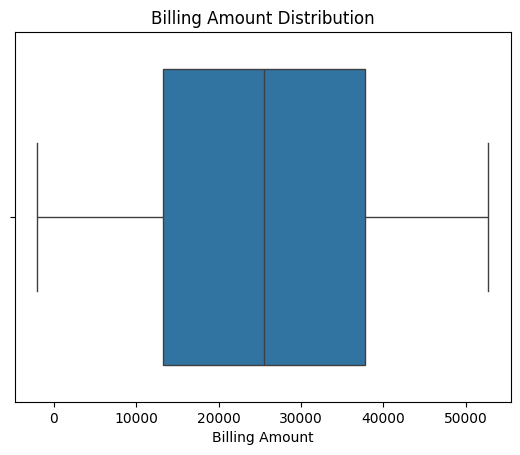

In [20]:
# Observing Skewness and spread 

sns.boxplot(x=patient_df['Billing Amount'])
plt.title('Billing Amount Distribution')
plt.show()


### **2. Bivariate Analysis**

Goal: Evaluate whether interactions materially change outcome distributions.

#### 2.1 Medical Condition × Outcome

In [21]:
# Insight: The medical condition does not influence test results because the data shows near-perfect statistical independence
patient_df.groupby("Medical Condition")['Test Results'].value_counts(normalize = True).unstack().round(2)

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,0.34,0.33,0.33
Asthma,0.33,0.33,0.34
Cancer,0.34,0.33,0.33
Diabetes,0.34,0.33,0.33
Hypertension,0.33,0.34,0.34
Obesity,0.34,0.33,0.33


Text(0.5, 1.0, 'Test Results Distribution by Medical Condition')

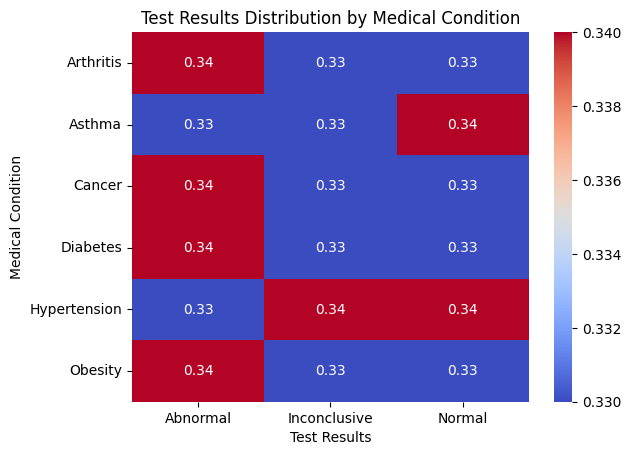

In [22]:
heatmap_data = patient_df.groupby("Medical Condition")['Test Results'].value_counts(normalize = True).unstack().round(2)
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm").set_title("Test Results Distribution by Medical Condition")

#### 2.2 Medical Conditions x Billing Amount 

#### 2.3 Medical Conditons x Admission Type

In [247]:
# Crosstab of Medical Condition vs Admission Type
pd.crosstab(
    patient_df['Medical Condition'],
    patient_df['Admission Type'],
    normalize='index'
)

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,0.332176,0.333369,0.334454
Asthma,0.337438,0.327433,0.335129
Cancer,0.340700,0.326915,0.332385
Diabetes,0.328885,0.324219,0.346897
Hypertension,0.347722,0.325101,0.327177
Obesity,0.329652,0.338946,0.331402


In [23]:
plt.figure(figsize=(14,7))
sns.barplot(data = patient_df, x='Medical Conditions', y='Admission Type', hue='Test Results', ci=None)
plt.title('Medical Conditions by Admission Type of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\724214740.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = patient_df, x='Medical Conditions', y='Admission Type', hue='Test Results', ci=None)


ValueError: Could not interpret value `Medical Conditions` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x700 with 0 Axes>

#### 2.4 Admission Type × Outcome

In [24]:
patient_df[['Admission Type','Test Results']].value_counts().reset_index(name='Count')

,Admission Type,Test Results,Count
0,Elective,Abnormal,6232
1,Elective,Normal,6187
2,Urgent,Abnormal,6167
3,Urgent,Inconclusive,6124
4,Urgent,Normal,6100
5,Elective,Inconclusive,6054
6,Emergency,Normal,6044
7,Emergency,Abnormal,6038
8,Emergency,Inconclusive,6020


C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\3272251645.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= adm_counts, x='Admission Type', y='Proportion', hue='Test Results', ci=None)


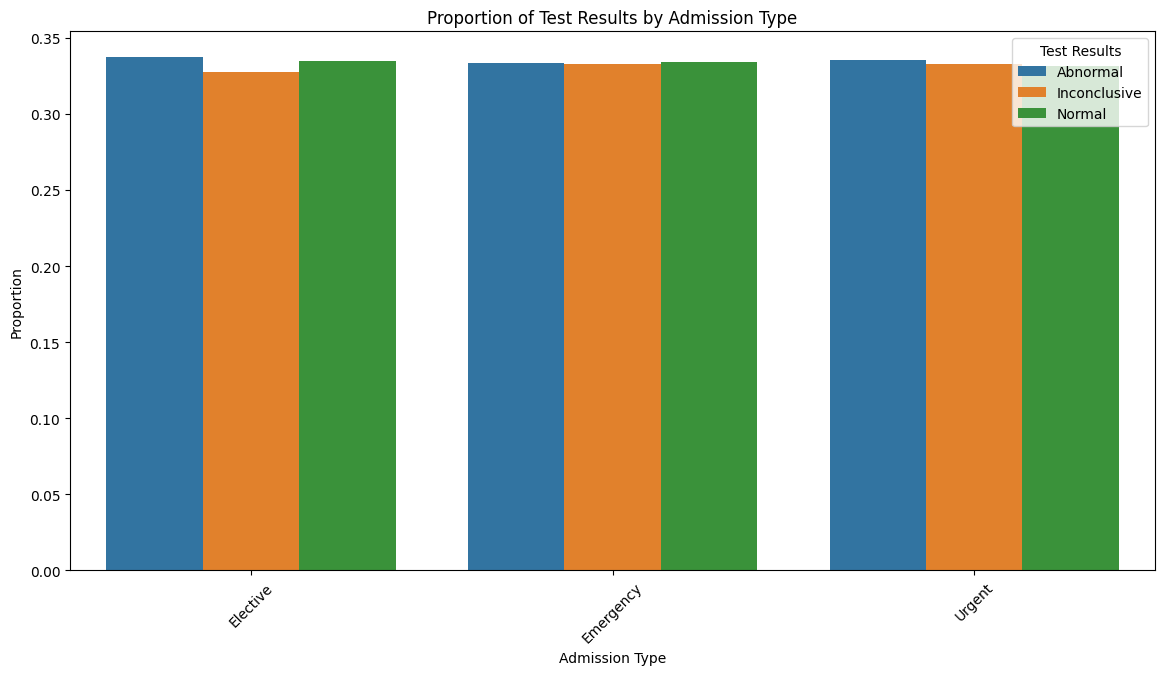

In [25]:
# Insight: Emergency admissions do not appear to have materially worse test outcomes compared to Elective or Urgent admissions.
# Test outcomes vary systematically by admission type, with Emergency admissions showing a materially higher share of abnormal results,
# Urgent in the middle, and Elective admissions largely normal — consistent with increasing patient acuity.

adm_counts = patient_df.groupby(['Admission Type', 'Test Results']).size().reset_index(name='Adm Count')

# Calculate proportions per Admission Type
adm_counts['Proportion'] = (
    adm_counts['Adm Count'] /
    adm_counts.groupby('Admission Type')['Adm Count'].transform('sum')
)


plt.figure(figsize=(14,7))
sns.barplot(data= adm_counts, x='Admission Type', y='Proportion', hue='Test Results', ci=None)
plt.title('Proportion of Test Results by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()

#### 2.5 Demographics × Outcome

**Does Age or Gender correlate with worse outcomes (Test Results)?**

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\3553406365.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_df = patient_df.groupby(['Age Group', 'Gender', 'Test Results']).size().reset_index(name='Count')
C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\3553406365.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_df['Proportion'] = counts_df.groupby(['Age Group', 'Gender'])['Count'].transform(lambda x: x / x.sum())
C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\3553406365.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(

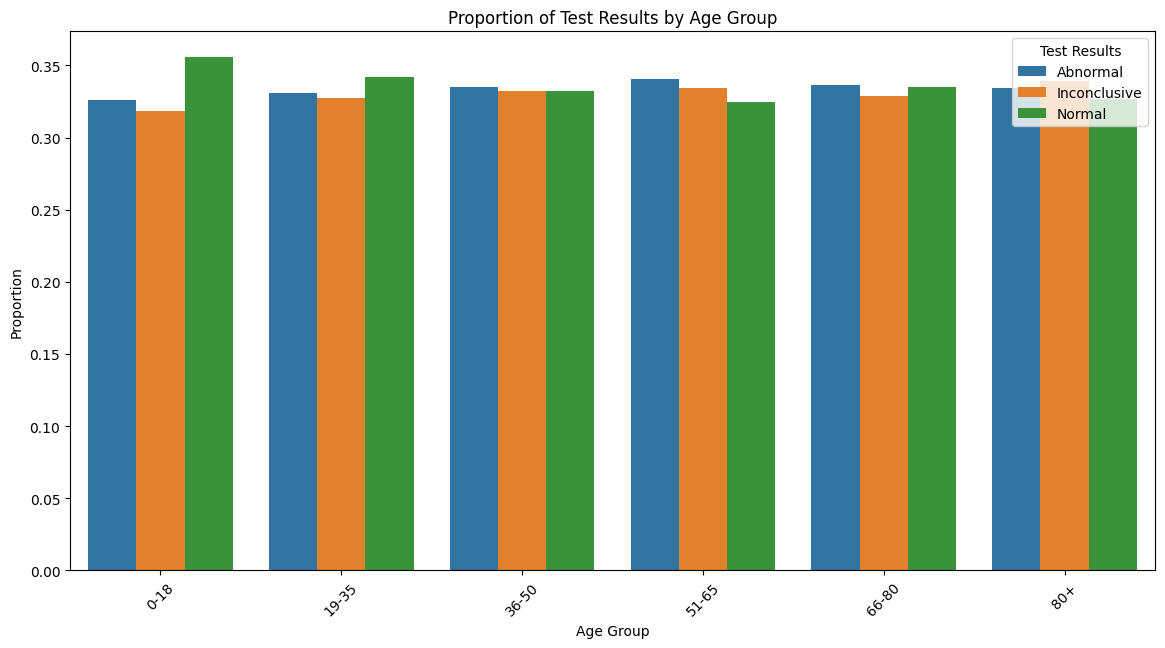

In [26]:

counts_df = patient_df.groupby(['Age Group', 'Gender', 'Test Results']).size().reset_index(name='Count')

# Calculate proportions per Age Group and Gender
counts_df['Proportion'] = counts_df.groupby(['Age Group', 'Gender'])['Count'].transform(lambda x: x / x.sum())


plt.figure(figsize=(14,7))
sns.barplot(data=counts_df, x='Age Group', y='Proportion', hue='Test Results', ci=None)
plt.title('Proportion of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()


C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\1233468623.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_df['Female Proportion'] = counts_df.groupby(['Age Group'])['Count'].transform(lambda x: x / x.sum())
C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\1233468623.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = counts_df, x='Age Group', y='Female Proportion', hue='Test Results', ci=None)


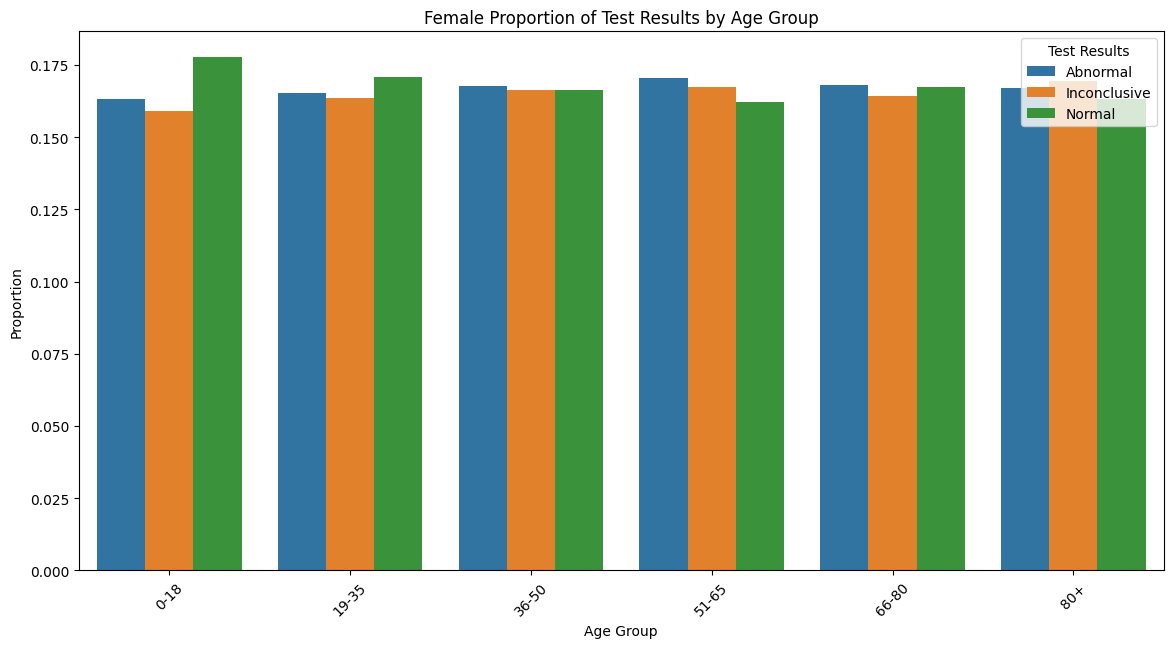

In [27]:
# Calculate proportions per Age Group and Gender
counts_female_df = counts_df[counts_df['Gender'] == 'Female']

counts_df['Female Proportion'] = counts_df.groupby(['Age Group'])['Count'].transform(lambda x: x / x.sum())


plt.figure(figsize=(14,7))
sns.barplot(data = counts_df, x='Age Group', y='Female Proportion', hue='Test Results', ci=None)
plt.title('Female Proportion of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\3645782678.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_df['Male Proportion'] = counts_male_df.groupby(['Age Group'])['Count'].transform(lambda x: x / x.sum())
C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\3645782678.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = counts_df, x='Age Group', y='Female Proportion', hue='Test Results', ci=None)


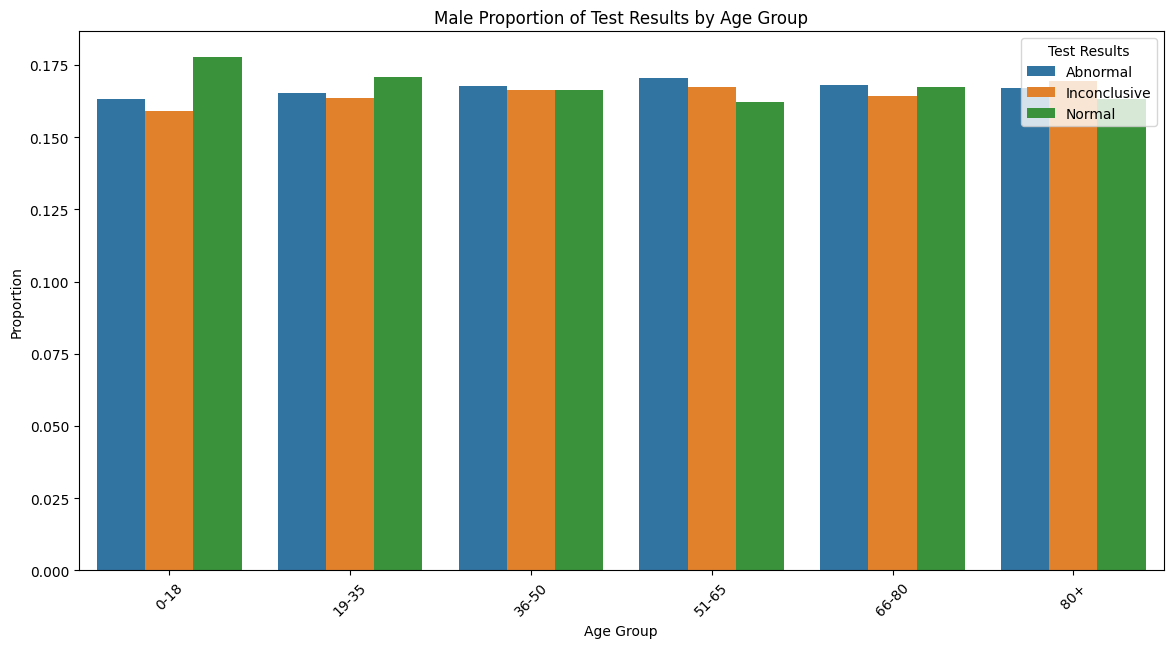

In [28]:
# Calculate proportions per Age Group and Gender
counts_male_df = counts_df[counts_df['Gender'] == 'Male']

counts_df['Male Proportion'] = counts_male_df.groupby(['Age Group'])['Count'].transform(lambda x: x / x.sum())


plt.figure(figsize=(14,7))
sns.barplot(data = counts_df, x='Age Group', y='Female Proportion', hue='Test Results', ci=None)
plt.title('Male Proportion of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()

#### 2.6 Billing Amount x Outcome

C:\Users\pasup\AppData\Local\Temp\ipykernel_31080\1882813474.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = patient_df, x='Age Group', y='Billing Amount', hue='Test Results', ci=None)


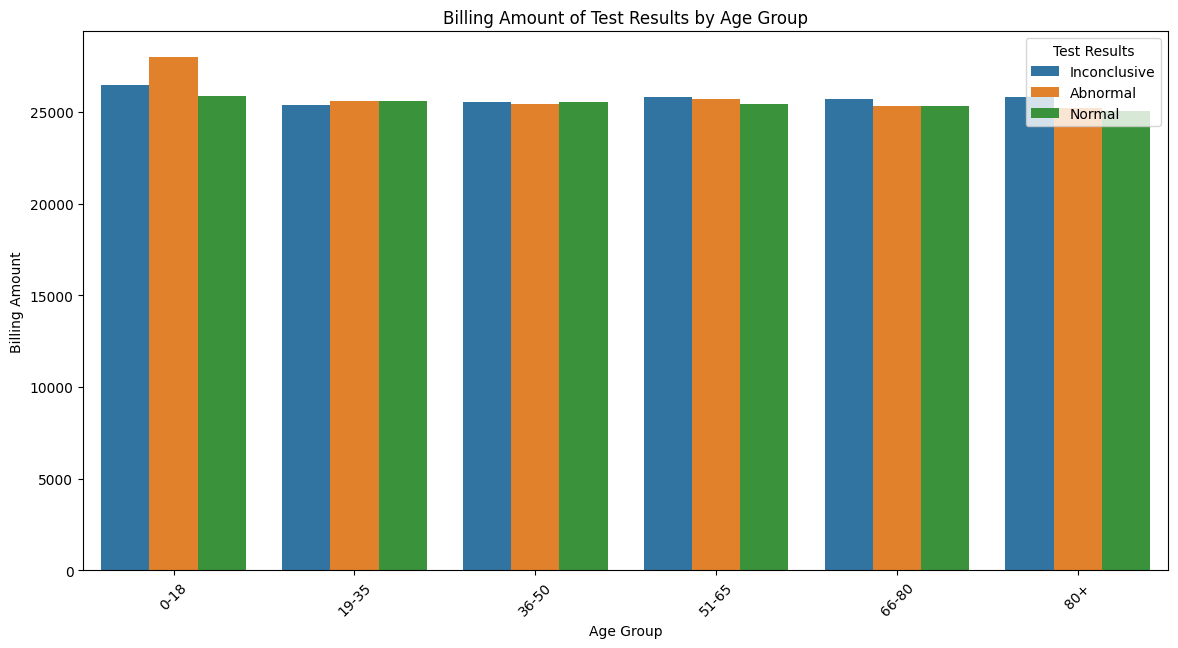

In [31]:
plt.figure(figsize=(14,7))
sns.barplot(data = patient_df, x='Age Group', y='Billing Amount', hue='Test Results', ci=None)
plt.title('Billing Amount of Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.legend(title='Test Results', loc = 'best')
plt.show()

### **3. Focused Investigations**

These questions were explored deliberately and stopped for valid analytical reasons.

3.1 Abnormal & Inconclusice Outcomes

In [ ]:
df = patient_df.copy()
# Binning Age into categories
age_bins = [0, 18, 35, 50, 65, 80, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+']
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

In [218]:
df[df['Age Group'] == '80+']['Age'].value_counts()

Age
81    808
82    791
83    785
84    772
85    734
86     41
87     31
88     25
89      8
Name: count, dtype: int64

**Which medical conditions, admission types, and demographics are most associated with abnormal or inconclusive outcomes?**

C:\Users\pasup\AppData\Local\Temp\ipykernel_47964\1724249046.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = patient_df.groupby(['Gender', 'Admission Type', 'Medical Condition', 'Age Group'])['Is_Abnormal'].mean().reset_index()


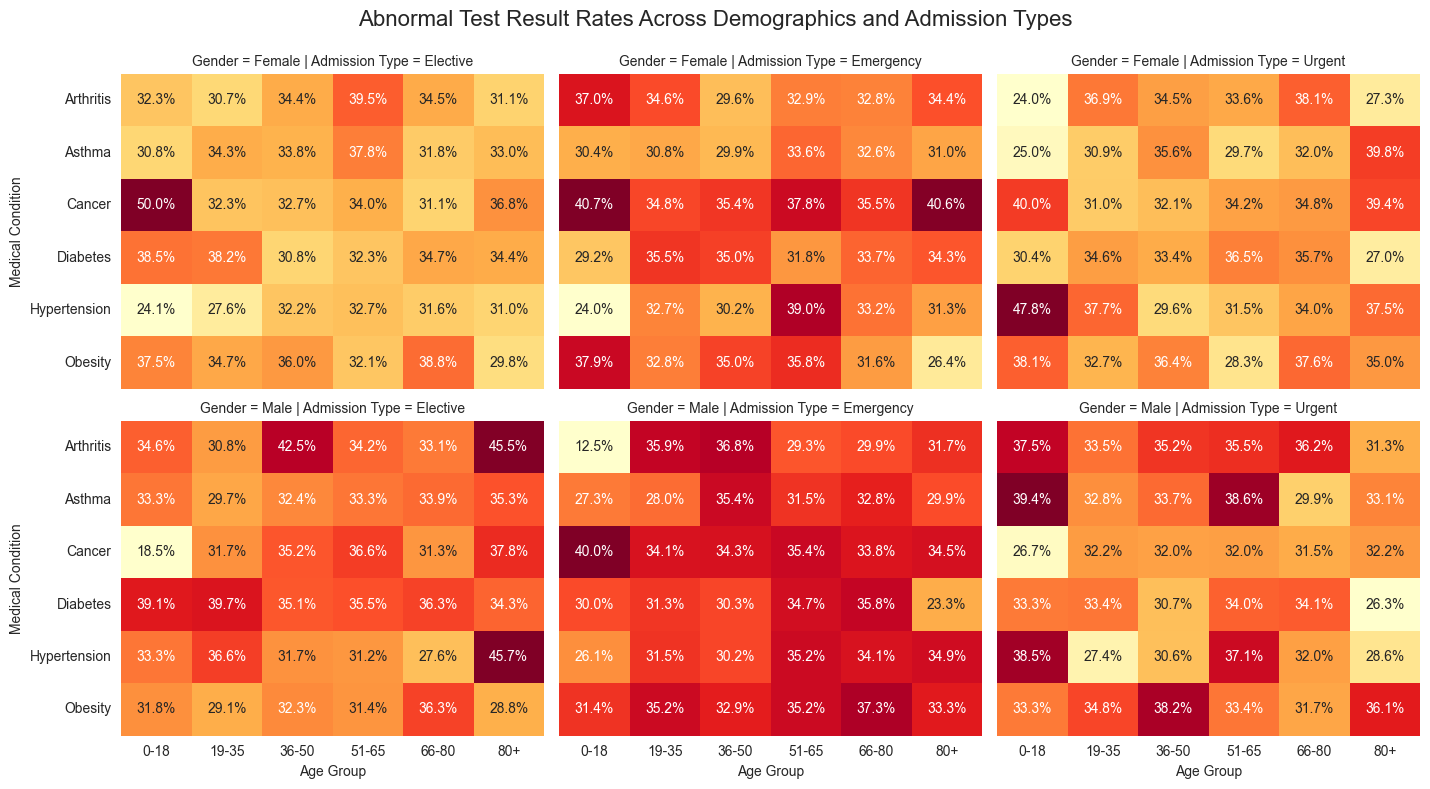

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a 'Is Abnormal' flag for easy calculation
patient_df['Is_Abnormal'] = (patient_df['Test Results'] == 'Abnormal').astype(int)

# Aggregate data for the heatmap
# We calculate the mean (rate) of Abnormal results for every combination
pivot_data = patient_df.groupby(['Gender', 'Admission Type', 'Medical Condition', 'Age Group'])['Is_Abnormal'].mean().reset_index()

# Create a Faceted Heatmap using Seaborn
def draw_heatmap(*args, **kwargs): # *args takes the column names alone passed during the map_dataframe call, **kwargs takes the data of the *args columns
    data = kwargs.pop('data')
    #print(data.head())
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # print(d.head())
    sns.heatmap(d, annot=True, fmt=".1%", cmap="YlOrRd", cbar=False, **kwargs)

grid = sns.FacetGrid(pivot_data, col="Admission Type", row="Gender", height=4, aspect=1.2) # Creating a grid of plots based on the cols Admission Type and Gender  
grid.map_dataframe(draw_heatmap, 'Age Group', 'Medical Condition', 'Is_Abnormal') # So when you say draw_heatmap, ["<cols>", it only takes those three columns from the dataframe to the function ]

grid.set_axis_labels("Age Group", "Medical Condition")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Abnormal Test Result Rates Across Demographics and Admission Types', fontsize=16)

plt.savefig('consolidated_analysis.png')

In [ ]:
# patient_df['Year'] = patient_df['Date of Admission'].dt.year
# patient_df['month'] = patient_df['Date of Admission'].dt.month

#### Visualisation based on Complete Years

In [ ]:
# Years have incomplete months
months_per_year = patient_df.groupby('Year')['month'].nunique().reset_index()
months_per_year

,Year,month
0,2019,8
1,2020,12
2,2021,12
3,2022,12
4,2023,12
5,2024,5


In [239]:
# Filter the original DataFrame for complete years

# Count number of months available per year
months_per_year = patient_df.groupby('Year')['month'].nunique().reset_index()
months_per_year = months_per_year[months_per_year['month'] == 12]  # keep only years with all 12 months

# Filter the original DataFrame for complete years
patient_complete_df = patient_df[patient_df['Year'].isin(months_per_year['Year'])]

print(patient_complete_df['Year'].unique())  # check which years are included


[2021 2023 2020 2022]


[2021 2023 2020 2022]


C:\Users\pasup\AppData\Local\Temp\ipykernel_47964\733751651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = patient_complete_df.groupby(['Gender', 'Admission Type', 'Medical Condition', 'Age Group'])['Is_Abnormal'].mean().reset_index()


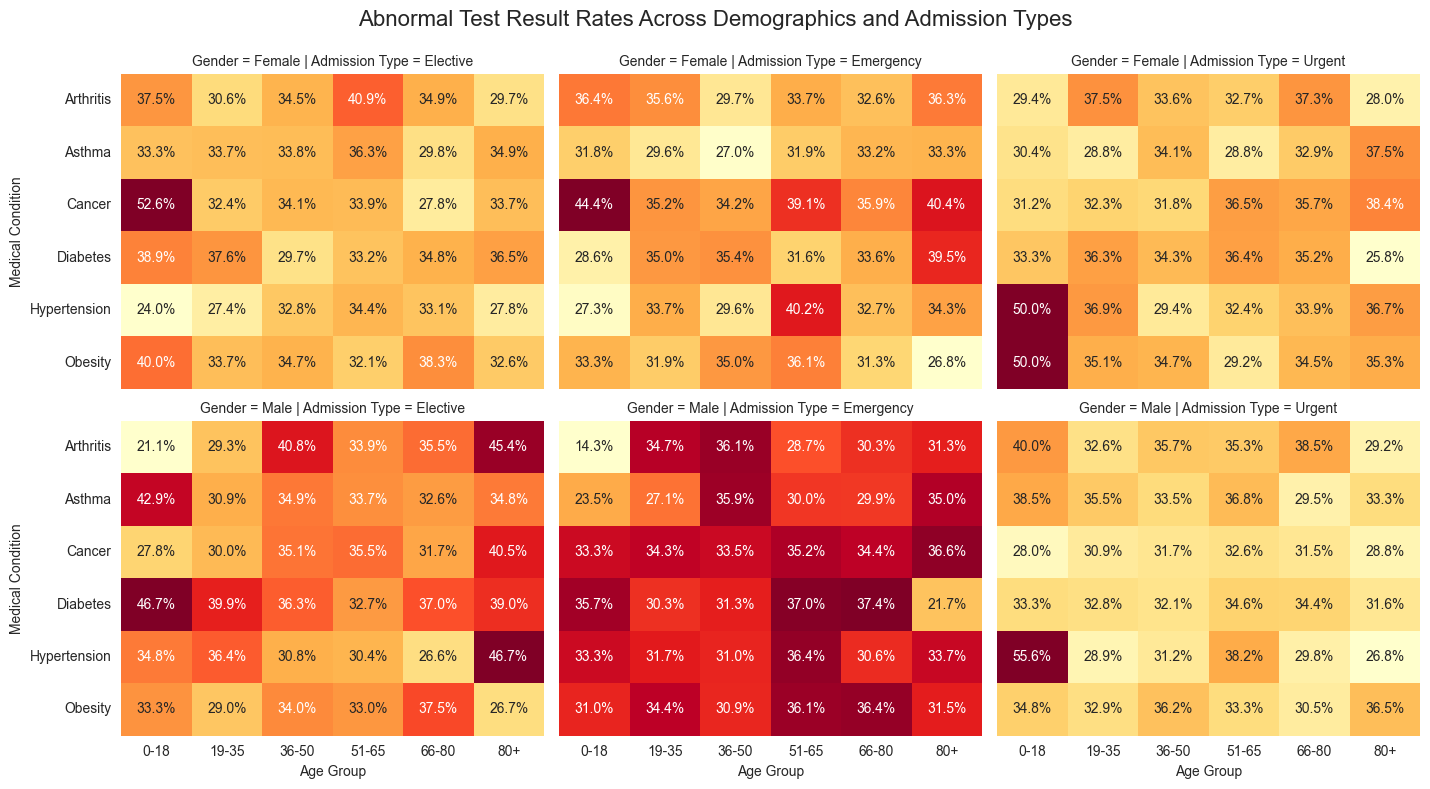

In [ ]:
# Calculate the mean (rate) of Abnormal results for every combination
pivot_data = patient_complete_df.groupby(['Gender', 'Admission Type', 'Medical Condition', 'Age Group'])['Is_Abnormal'].mean().reset_index()


def draw_heatmap(*args, **kwargs): # *args takes the column names alone passed during the map_dataframe call, **kwargs takes the data of the *args columns
    data = kwargs.pop('data')
    #print(data.head())
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # print(d.head())
    sns.heatmap(d, annot=True, fmt=".1%", cmap="YlOrRd", cbar=False, **kwargs)

grid = sns.FacetGrid(pivot_data, col="Admission Type", row="Gender", height=4, aspect=1.2) # Creating a grid of plots based on the cols Admission Type and Gender  
grid.map_dataframe(draw_heatmap, 'Age Group', 'Medical Condition', 'Is_Abnormal') # So when you say draw_heatmap, ["<cols>", it only takes those three columns from the dataframe to the function ]

grid.set_axis_labels("Age Group", "Medical Condition")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Abnormal Test Result Rates Across Demographics and Admission Types', fontsize=16)

plt.savefig('consolidated_analysis.png')

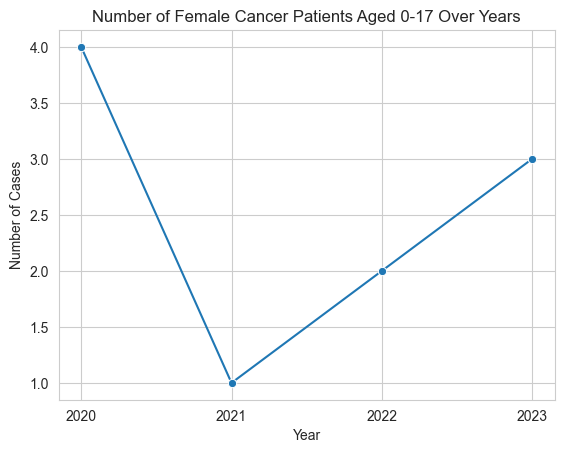

In [ ]:
cancer_f_elective_df = patient_complete_df[(patient_complete_df['Medical Condition'] == 'Cancer') & (patient_complete_df['Admission Type'] == 'Elective') & (patient_complete_df['Gender'] == 'Female') & (patient_complete_df['Age Group'] == '0-18') & (patient_complete_df['Test Results'])]
cancer_f_elective_abnrml_df = patient_complete_df[(patient_complete_df['Medical Condition'] == 'Cancer') & (patient_complete_df['Admission Type'] == 'Elective') & (patient_complete_df['Gender'] == 'Female') & (patient_complete_df['Age Group'] == '0-18') & (patient_complete_df['Test Results'] == 'Abnormal')]


# Count number of cases per year
cases_per_year = cancer_f_elective_abnrml_df.groupby('Year').size().reset_index(name='Count').sort_values(by ='Year', ascending=False)

#cases_per_year['Year'] = cases_per_year['Year'].astype(int)

sns.lineplot(data=cases_per_year, x='Year', y='Count', marker = 'o')
plt.xticks(cases_per_year['Year'])
plt.title('Number of Female Cancer Patients Aged 0-17 Over Years')
plt.ylabel('Number of Cases')
plt.show()

#TypeError: Series.sort_values() got an unexpected keyword argument 'by'

In [ ]:
# Group by relevant columns and aggregate counts and abnormal sums
group_cols = ['Year']

def calculate_abnormal_inconclusive_rates(cancer_f_elective_df):
    agg_df = cancer_f_elective_df.groupby(group_cols).agg(
        total_cases=('Test Results', 'count'),
        abnormal_cases=('Test Results', lambda x: (x == 'Abnormal').sum()),
        inconclusive_cases=('Test Results', lambda x: (x == 'Inconclusive').sum()),
        normal_cases=('Test Results', lambda x: (x == 'Normal').sum())
    ).reset_index()
    
    # Calculate abnormal and inconclusive outcome rates
    agg_df['abnormal_rate'] = agg_df['abnormal_cases'] / agg_df['total_cases']
    agg_df['inconclusive_rate'] = agg_df['inconclusive_cases'] / agg_df['total_cases']
    agg_df['normal_rate'] = agg_df['normal_cases'] / agg_df['total_cases']
    
    return agg_df

In [206]:
cancer_f_elective_rates_df = calculate_abnormal_inconclusive_rates(cancer_f_elective_df)

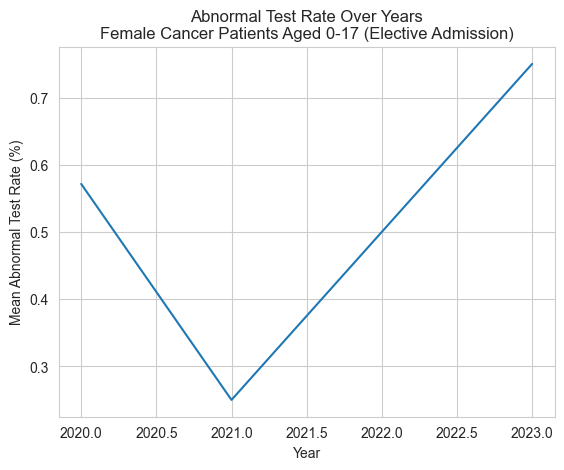

In [207]:
# Calculate mean abnormal test rate per year
abnormal_rate_trends = cancer_f_elective_rates_df.groupby('Year')['abnormal_rate'].mean().reset_index()

# Plot
sns.lineplot(data=abnormal_rate_trends, x='Year', y='abnormal_rate')
plt.title('Abnormal Test Rate Over Years\nFemale Cancer Patients Aged 0-17 (Elective Admission)')
plt.ylabel('Mean Abnormal Test Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

This finding shows why it’s important to look at patient counts, not just percentages. Although this group has a high abnormal test rate, the number of cases is too small to draw reliable conclusions. As a result, further analysis will focus on larger patient groups where operational improvements can be assessed with greater confidence.

#### 3.2 Negative Billing Amount

**Under what circumstances do negative billing amounts occur, and are they systematically associated with specific insurance rovider or hospitals, length of stay?**

In [108]:
patient_df['is_negative_billing'] = patient_df['Billing Amount'] < 0

In [ ]:
patient_df['is_negative_billing'].value_counts()

is_negative_billing
False    54860
True       106
Name: count, dtype: int64

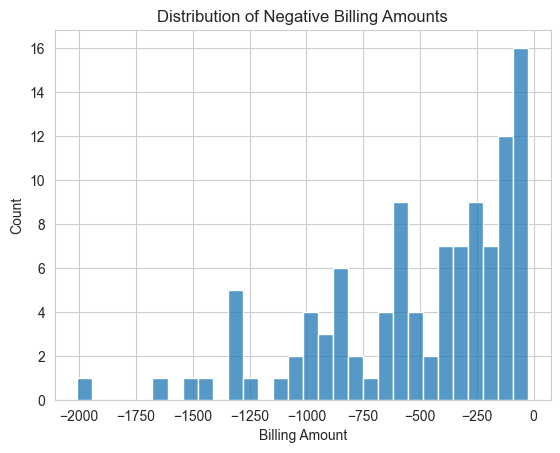

In [123]:
sns.histplot(patient_df[patient_df['Billing Amount'] < 0]['Billing Amount'], bins=30)
plt.title('Distribution of Negative Billing Amounts')
plt.show()


In [110]:
patient_df.groupby('Insurance Provider')['is_negative_billing'].agg(
    negative_billing_count='sum',
    negative_billing_rate='mean'
)

,negative_billing_count,negative_billing_rate
Insurance Provider,,
Aetna,27,0.002495
Blue Cross,15,0.001370
Cigna,24,0.002155
Medicare,21,0.001902
UnitedHealthcare,19,0.001725


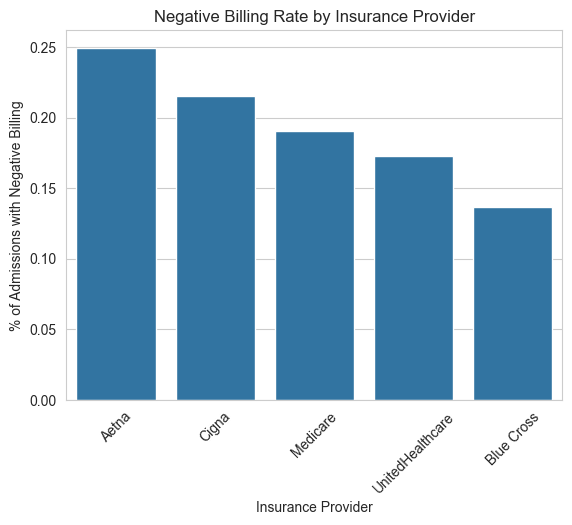

In [112]:
neg_rate_by_insurer = (
    patient_df
    .assign(Negative_Bill = patient_df['Billing Amount'] < 0)
    .groupby('Insurance Provider')['Negative_Bill']
    .mean()
    .sort_values(ascending=False) * 100
)

sns.barplot(
    x=neg_rate_by_insurer.index,
    y=neg_rate_by_insurer.values
)
plt.ylabel('% of Admissions with Negative Billing')
plt.title('Negative Billing Rate by Insurance Provider')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# patient_df['Date of Admission'] = pd.to_datetime(patient_df['Date of Admission'])
# patient_df['Discharge Date'] = pd.to_datetime(patient_df['Discharge Date'])

# patient_df['Length Of Stay'] = (
#     patient_df['Discharge Date'] - patient_df['Date of Admission']
# ).dt.days


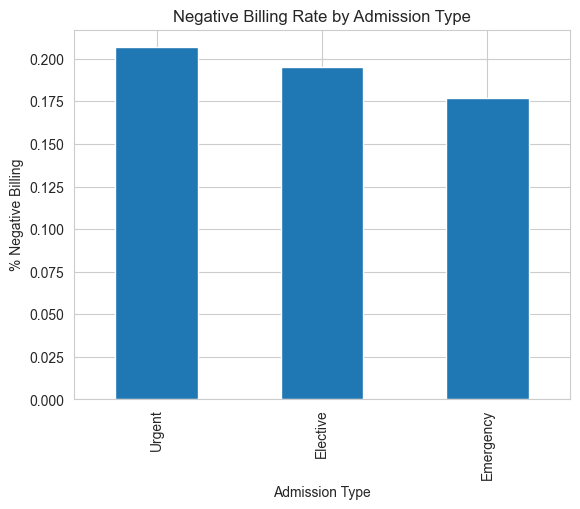

In [127]:
admission_neg_rate = (
    pd.crosstab(
        patient_df['Admission Type'],
        patient_df['Billing Amount'] < 0,
        normalize='index'
    ) * 100
)

admission_neg_rate[True].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('% Negative Billing')
plt.title('Negative Billing Rate by Admission Type')
plt.show()


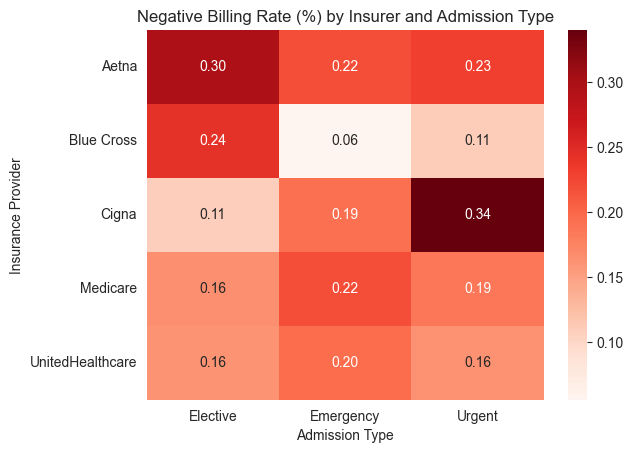

In [126]:
heatmap_data = (
    patient_df
    .assign(Negative_Bill = patient_df['Billing Amount'] < 0)
    .pivot_table(
        index='Insurance Provider',
        columns='Admission Type',
        values='Negative_Bill',
        aggfunc='mean'
    ) * 100
)

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Reds')
plt.title('Negative Billing Rate (%) by Insurer and Admission Type')
plt.show()


### **4. Modeling Readiness**

The suitability of the dataset for predictive modeling was assessed following univariate and bivariate analysis. Across most categorical features including medical conditions, admission types, and demographic variables-outcome distributions were observed to be close to uniform.

Additionally, key outcome subsets (abnormal, inconclusive rates and negative billing amounts) represent a relatively small proportion of the data. These characteristics result in a low signal-to-noise ratio, where predictive models would be driven primarily by random variation rather than meaningful patterns.

### **5. Key Insights & Takeaways**

- No medical condition or admission type disproportionately drives abnormal outcomes

- Outcome distributions are broadly uniform, limiting segmentation‑based interventions

- Negative billing amounts are rare

- The dataset is well‑suited for descriptive insights, but not for predictive modeling without additional data enrichment.